TensorFlow version: 2.19.0
TASK 1: FEEDFORWARD NEURAL NETWORK (NN)
Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10
Flattened input shape: (60000, 784)
One-hot encoded labels shape: (60000, 10)

Building Feedforward Neural Network...

FNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Training FNN model...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4471 - val_accuracy: 0.9640 - val_loss: 0.1214
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9663 - loss: 0.1094 - val_accuracy: 0.9731 - val_loss: 0.0880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9758 - val_loss: 0.0823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9851 - loss: 0.0488 - val_accuracy: 0.9751 - val_loss: 0.0873
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9729 - val_loss: 0.1049
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0293 - val_accuracy: 0.9772 - val_loss: 0.0880
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9766 - val_loss: 0.0936
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy:

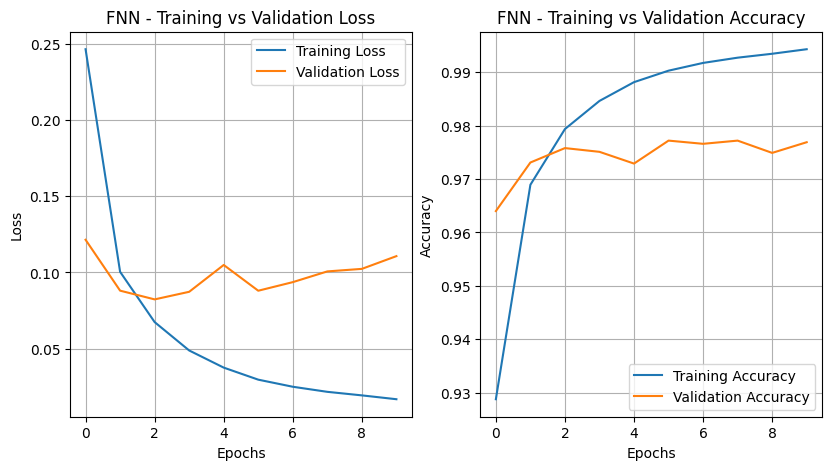

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)

print("TASK 1: FEEDFORWARD NEURAL NETWORK (NN)")

# Load and preprocess MNIST dataset
print("Loading MNIST dataset...")
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train_mnist.shape}")
print(f"Test data shape: {x_test_mnist.shape}")
print(f"Number of classes: {len(np.unique(y_train_mnist))}")

# Preprocess the data
# Normalize pixel values
x_train_mnist = x_train_mnist.astype('float32') / 255.0
x_test_mnist = x_test_mnist.astype('float32') / 255.0

# Flatten images for feedforward network (28x28)
x_train_flat = x_train_mnist.reshape(x_train_mnist.shape[0], -1)
x_test_flat = x_test_mnist.reshape(x_test_mnist.shape[0], -1)

# Convert labels to categorical (one-hot encoding)
y_train_mnist_cat = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist_cat = keras.utils.to_categorical(y_test_mnist, 10)

print(f"Flattened input shape: {x_train_flat.shape}")
print(f"One-hot encoded labels shape: {y_train_mnist_cat.shape}")

# Build Feedforward Neural Network
print("\nBuilding Feedforward Neural Network...")
fnn_model = keras.Sequential([
    layers.Input(shape=(784,)),                    # Input layer
    layers.Dense(128, activation='relu'),          # Hidden layer 1
    layers.Dense(64, activation='relu'),           # Hidden layer 2
    layers.Dense(10, activation='softmax')         # Output layer
])

# Compile the model
fnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nFNN Model Architecture:")
fnn_model.summary()

# Train the model
print("\nTraining FNN model...")
fnn_history = fnn_model.fit(
    x_train_flat, y_train_mnist_cat,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_flat, y_test_mnist_cat),
    verbose=1
)

# Evaluate the model
fnn_loss, fnn_accuracy = fnn_model.evaluate(x_test_flat, y_test_mnist_cat, verbose=0)
print(f"\nFNN Test Accuracy: {fnn_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fnn_history.history['loss'], label='Training Loss')
plt.plot(fnn_history.history['val_loss'], label='Validation Loss')
plt.title('FNN - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(fnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)




TASK 2: CONVOLUTIONAL NEURAL NETWORK (CNN)
Loading CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10
Normalized input shape: (50000, 32, 32, 3)

Building Convolutional Neural Network...

CNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,890 (2.80 MB)

 Trainable params: 734,890 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


Training CNN model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 175s 110ms/step - accuracy: 0.2912 - loss: 1.8954 - val_accuracy: 0.5468 - val_loss: 1.2485
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 109ms/step - accuracy: 0.5337 - loss: 1.2860 - val_accuracy: 0.6132 - val_loss: 1.0905
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 108ms/step - accuracy: 0.5973 - loss: 1.1240 - val_accuracy: 0.6526 - val_loss: 0.9901
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 107ms/step - accuracy: 0.6325 - loss: 1.0371 - val_accuracy: 0.6857 - val_loss: 0.9024
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 108ms/step - accuracy: 0.6551 - loss: 0.9718 - val_accuracy: 0.7059 - val_loss: 0.8518

CNN Test Accuracy: 0.7059


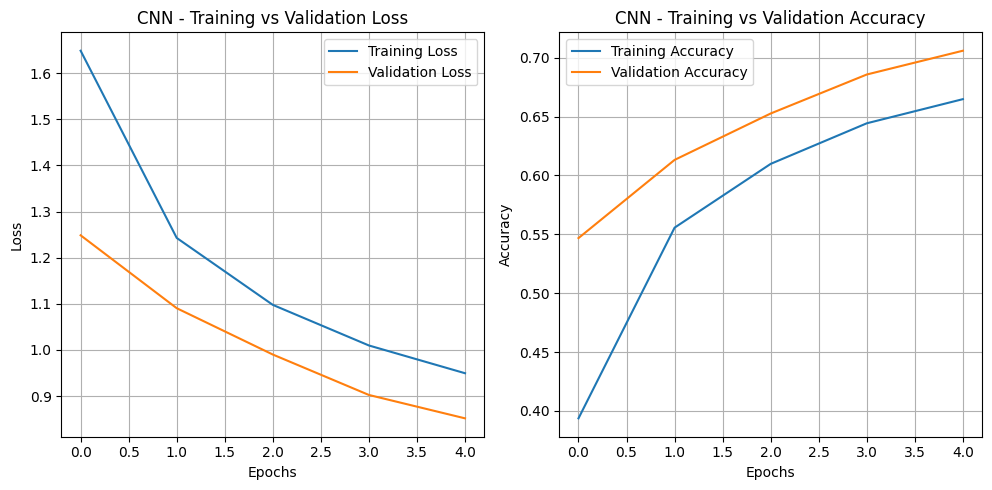

In [5]:
print("TASK 2: CONVOLUTIONAL NEURAL NETWORK (CNN)")


# Load and preprocess CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train_cifar.shape}")
print(f"Test data shape: {x_test_cifar.shape}")
print(f"Number of classes: {len(cifar10_classes)}")

# Preprocess the data
# Normalize pixel values
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Convert labels to categorical
y_train_cifar_cat = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar_cat = keras.utils.to_categorical(y_test_cifar, 10)

print(f"Normalized input shape: {x_train_cifar.shape}")

# Build Convolutional Neural Network
print("\nBuilding Convolutional Neural Network...")
cnn_model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.25),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nCNN Model Architecture:")
cnn_model.summary()

# Train the model
print("\nTraining CNN model...")
cnn_history = cnn_model.fit(
    x_train_cifar, y_train_cifar_cat,
    batch_size=32,
    epochs=5,
    validation_data=(x_test_cifar, y_test_cifar_cat),
    verbose=1
)

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cifar, y_test_cifar_cat, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

TASK 3: RECURRENT NEURAL NETWORK (LSTM)
Loading IMDB dataset...
Training sequences: 25000
Test sequences: 25000
Average training sequence length: 238.7
Padding sequences...
Training data shape after padding: (25000, 250)
Test data shape after padding: (25000, 250)

Building LSTM model...

LSTM Model Architecture:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 353s 445ms/step - accuracy: 0.6733 - loss: 0.5832 - val_accuracy: 0.8212 - val_loss: 0.4029
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 379s 441ms/step - accuracy: 0.8232 - loss: 0.4109 - val_accuracy: 0.8243 - val_loss: 0.4072
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 315s 403ms/step - accuracy: 0.8529 - loss: 0.3548 - val_accuracy: 0.7730 - val_loss: 0.5287
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 316s 396ms/step - accuracy: 0.8637 - loss: 0.3238 - val_accuracy: 0.8395 - val_loss: 0.3983
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 357s 442ms/step - accuracy: 0.8888 - loss: 0.2726 - val_accuracy: 0.8444 - val_loss: 0.3950
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 345s 442ms/step - accuracy: 0.8999 - loss: 0.2548 - val_accuracy: 0.8519 - val_loss: 0.3904
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 443ms/step - accuracy: 0.9136 - loss: 0.2186 - val_accuracy: 0.8486 - val_loss: 0.4084
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 387s 450ms/s

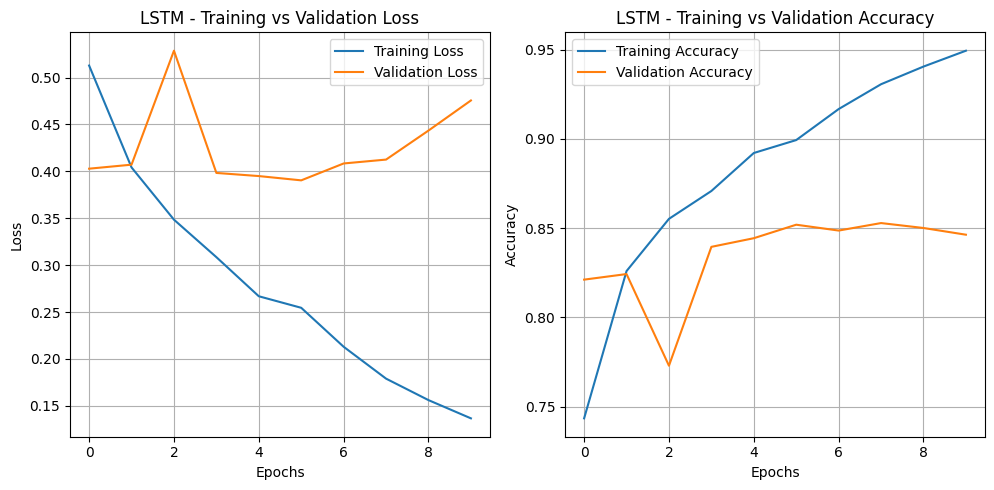

In [ ]:
print("TASK 3: RECURRENT NEURAL NETWORK (LSTM)")

# Load and preprocess IMDB dataset
print("Loading IMDB dataset...")
max_features = 10000  # Top 10000 most frequent words
max_len = 250  # Cut texts after this number of words

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = keras.datasets.imdb.load_data(
    num_words=max_features
)

print(f"Training sequences: {len(x_train_imdb)}")
print(f"Test sequences: {len(x_test_imdb)}")
print(f"Average training sequence length: {np.mean([len(x) for x in x_train_imdb]):.1f}")

# Pad sequences to have the same length
print("Padding sequences...")
x_train_imdb = keras.preprocessing.sequence.pad_sequences(x_train_imdb, maxlen=max_len)
x_test_imdb = keras.preprocessing.sequence.pad_sequences(x_test_imdb, maxlen=max_len)

print(f"Training data shape after padding: {x_train_imdb.shape}")
print(f"Test data shape after padding: {x_test_imdb.shape}")

# Build LSTM model
print("\nBuilding LSTM model...")
lstm_model = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.LSTM(64, dropout=0.5, recurrent_dropout=0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nLSTM Model Architecture:")
lstm_model.summary()

# Train the model
print("\nTraining LSTM model...")
lstm_history = lstm_model.fit(
    x_train_imdb, y_train_imdb,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_imdb, y_test_imdb),
    verbose=1
)

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_imdb, y_test_imdb, verbose=0)
print(f"\nLSTM Test Accuracy: {lstm_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM - Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

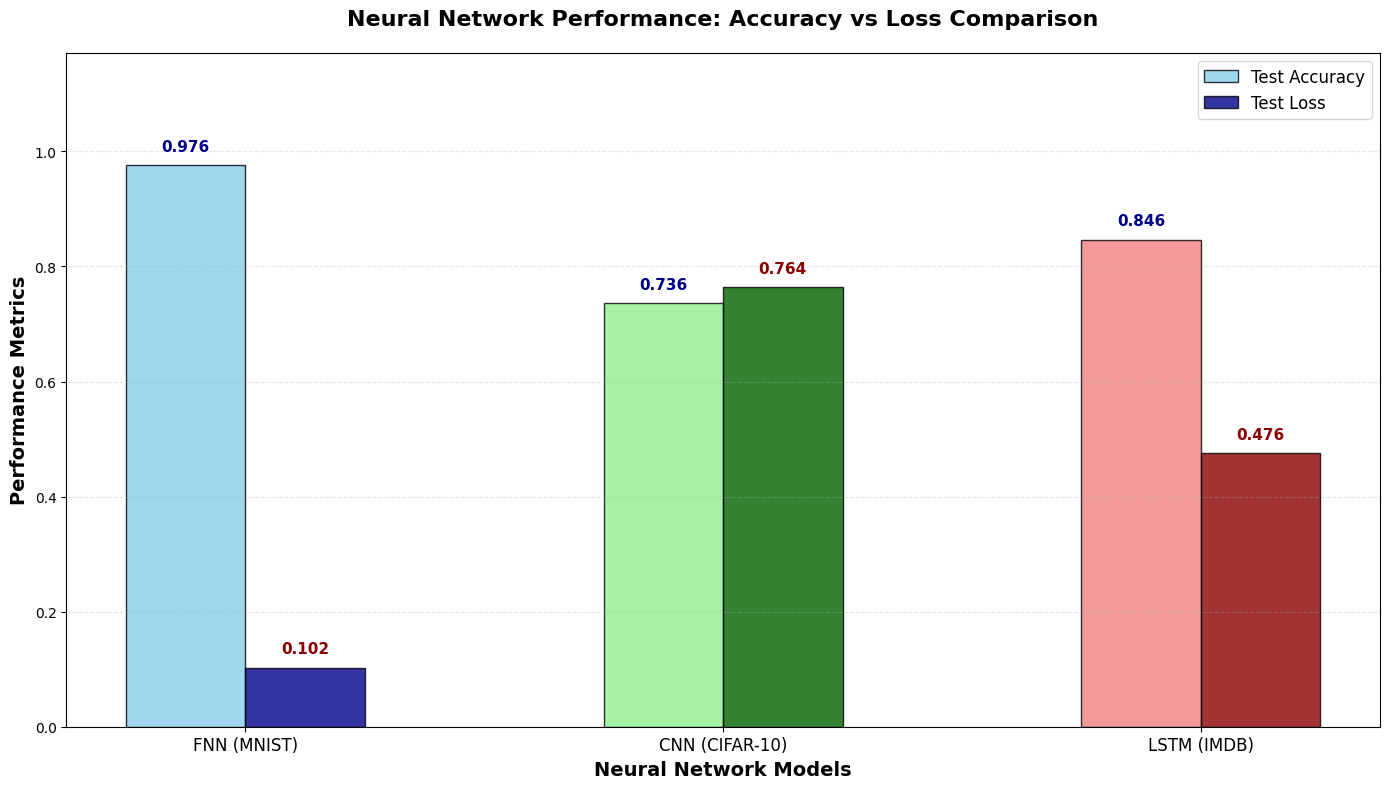

In [ ]:
models = ['FNN (MNIST)', 'CNN (CIFAR-10)', 'LSTM (IMDB)']
accuracies = [fnn_accuracy, cnn_accuracy, lstm_accuracy]
losses = [fnn_loss, cnn_loss, lstm_loss]

# Create grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.25  # Width of bars

plt.figure(figsize=(14, 8))

# Create bars
bars1 = plt.bar(x - width/2, accuracies, width, label='Test Accuracy',
                color=['skyblue', 'lightgreen', 'lightcoral'],
                alpha=0.8, edgecolor='black', linewidth=1)
bars2 = plt.bar(x + width/2, losses, width, label='Test Loss',
                color=['darkblue', 'darkgreen', 'darkred'],
                alpha=0.8, edgecolor='black', linewidth=1)

# Add labels and title
plt.xlabel('Neural Network Models', fontsize=14, fontweight='bold')
plt.ylabel('Performance Metrics', fontsize=14, fontweight='bold')
plt.title('Neural Network Performance: Accuracy vs Loss Comparison',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, models, fontsize=12)
plt.legend(fontsize=12, loc='upper right')

# Add value labels on bars
for bar, acc in zip(bars1, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{acc:.3f}', ha='center', va='bottom',
             fontweight='bold', fontsize=11, color='darkblue')

for bar, loss in zip(bars2, losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{loss:.3f}', ha='center', va='bottom',
             fontweight='bold', fontsize=11, color='darkred')

# Set y-axis limit to accommodate both metrics
plt.ylim(0, max(max(accuracies), max(losses)) * 1.2)

# Add horizontal grid lines for better readability
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()